# Семинар 6

# Введение в численные методы оптимизации. Градиентный спуск

## Постановка задачи

\begin{equation}
\begin{split}
& \min_{x \in S} f_0(x)\\
\text{s.t. } & f_j(x) = 0, \; j = 1,\ldots,m\\
& g_k(x) \leq 0, \; k = 1,\ldots,p
\end{split}
\end{equation}
где $S \subseteq \mathbb{R}^n$, $f_j: S \rightarrow \mathbb{R}, \; j = 0,\ldots,m$, $g_k: S \rightarrow \mathbb{R}, \; k=1,\ldots,p$

Все функции как минимум непрерывны. 

Важный факт</span>: задачи **нелинейной** оптимизации 

в их самой общей форме являются **численно неразрешимыми**!

![](Circle.png)

 Т.Е. у нас как-то генерируется последовательность $\{x_k\}$ и мы сходимся к решению? (оптимальному?)

## Общая схема численного метода

```python
def general_scheme(x0, epsilon):
    xk = x0
    while not stop_criterion (xk, epsilon):
        oracle_response  = oracle(xk)
        xk = new_point(xk, oracle_response)
    return xk
```

![](oracle.jpg)

## Какие методы бывают

### 1) методы нулевого порядка 
#### известны только значения функции
<ol>
<li>Nelder-Mead Method</li>
<li>Simulated annealing method</li>
<li>Line Search</li>
</ol>

### 2) методы первого порядка 
###### известны  значения функции и значения градиента
<ol>
<li>Gradient Descent</li>
<li>ADAM</li>

</ol>

### 3) методы высокого (второго) порядка 
###### известны  значения функции, значения градиента,  значение гессиана итд
<ol>
<li>Newton Methods</li>
<li>BFGS</li>

</ol>

## Критерии остановки
1. Сходимость по аргументу: 
$$
\| x_k - x^*  \|_2 < \varepsilon
$$ 
2. Сходимость по функции: 
$$
\| f_k - f^* \|_2 < \varepsilon
$$ 
3. Выполнение необходимого условия 
$$
\| f'(x_k) \|_2 < \varepsilon
$$


В чем проблемы каждого?

#### Но ведь $x^*$ неизвестна!

Тогда

\begin{align*}
& \|x_{k+1} - x_k \| = \|x_{k+1} - x_k + x^* - x^* \| \leq  \|x_{k+1} - x^* \| + \| x_k - x^* \| \leq 2\varepsilon
\end{align*}

Аналогично для сходимости по функции, однако иногда можно оценить $f^*$! 

**Замечание**: лучше использовать относительные изменения 

этих величин! 

Например $\dfrac{\|x_{k+1} - x_k \|_2}{\| x_k \|_2}$


## Как сравнивать методы оптимизации?

1) Можно ли сравнивать методы по времени исполнения?


2) Количество вызовов функции, арифметическая сложность


3) Скорость сходимости

### Скорости сходимости 
1. Сублинейная


$$
\| x_{k+1} - x^* \|_2 \leq C k^{\alpha},
$$
где $\alpha < 0$ и $ 0 < C < \infty$


2. Линейная (геометрическая прогрессия)


$$
\| x_{k+1} - x^* \|_2 \leq Cq^k \; \; \; \;\; \; \; \;  \; \; \; \;\; \; \; \;  or \; \; \; \;\; \; \; \;  \; \; \; \;\; \; \; \; \| x_{k+1} - x^* \|_2 \leq q  \| x_{k} - x^* \|_2 
$$
где $q \in (0, 1)$ и $ 0 < C < \infty$



3. Сверхлинейная 


$$
\| x_{k+1} - x^* \|_2 \leq Cq^{k^p} \; \; \; \;\; \; \; \;  \; \; \; \;\; \; \; \;  or \; \; \; \;\; \; \; \;  \; \; \; \;\; \; \; \; \| x_{k+1} - x^* \|_2 \leq C_k  \| x_{k} - x^* \|_2 
$$

где $q \in (0, 1)$, $ 0 < C < \infty$ и $p > 1$, $C_k \rightarrow 0$


4. Квадратичная


$$
\| x_{k+1} - x^* \|_2 \leq C\| x_k - x^* \|^2_2, \qquad \text{или} \qquad \| x_{k+1} - x^* \|_2 \leq C q^{2^k}
$$
где $q \in (0, 1)$ и $ 0 < C < \infty$

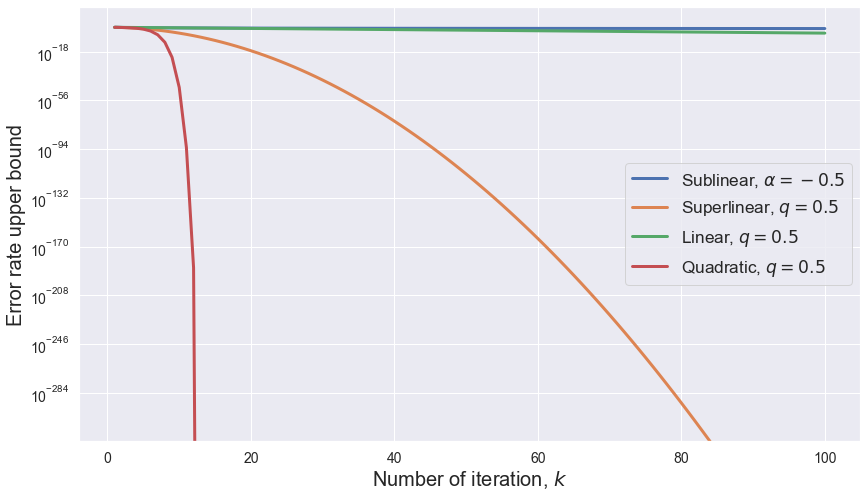

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

C = 10
alpha = -0.5
q = 0.9
num_iter = 100

sublinear = np.array([C * k**alpha for k in range(1, num_iter + 1)])
linear = np.array([C * q**k for k in range(1, num_iter + 1)])
superlinear = np.array([C * q**(k**2) for k in range(1, num_iter + 1)])
quadratic = np.array([C * q**(2**k) for k in range(1, num_iter + 1)])
plt.figure(figsize=(14,8))
plt.semilogy(np.arange(1, num_iter+1), sublinear, 
             label=r"Sublinear, $\alpha = -0.5$", linewidth =3)
plt.semilogy(np.arange(1, num_iter+1), superlinear, 
             label=r"Superlinear, $q = 0.5$", linewidth =3)
plt.semilogy(np.arange(1, num_iter+1), linear, 
             label=r"Linear, $q = 0.5$", linewidth =3)
plt.semilogy(np.arange(1, num_iter+1), quadratic, 
             label=r"Quadratic, $q = 0.5$", linewidth =3)
plt.xlabel("Number of iteration, $k$", fontdict= {'fontsize': 20,})
plt.ylabel("Error rate upper bound", fontdict= {'fontsize': 20,})
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.legend(loc="best", fontsize='x-large')

plt.savefig('convergence.svg')

## Со скоростью понятно, а идти куда?


Последовательность $x_k$ генерируется по правилу
$$
x_{k+1} = x_k + \alpha_k h_k
$$
так что
$$
f(x_{k+1}) < f(x_k)
$$

#### $h_k$ - направление наискорейшего спуска

## А это куда?




Рассмотрим линейную аппроксимацию дифференцируемой функции $f$ вдоль некоторого направления убывания $h, \|h\|_2 = 1$:


$$
f(x + \alpha h) = f(x) + \alpha \langle f'(x), h \rangle + o(\alpha)
$$
Из условия убывания
$$
f(x + \alpha h) < f(x)
$$



$$
f(x) + \alpha \langle f'(x), h \rangle + o(\alpha) < f(x)
$$
и переходя к пределу при $\alpha \rightarrow 0$:
$$
\langle f'(x), h \rangle \leq 0
$$
Также из неравенства Коши-Буняковского-Шварца
$$
\langle f'(x), h \rangle \geq -\| f'(x) \|_2 \| h \|_2 = -\| f'(x) \|_2
$$

Таким образом, направление антиградиента 
$$
h = -\dfrac{f'(x)}{\|f'(x)\|_2}
$$
даёт направление **наискорейшего локального** убывания функции$~f$.

В итоге метод имеет вид
$$
x_{k+1} = x_k - \alpha_k f'(x_k)
$$

## Как выбрать шаг $\alpha_k$? 

Список подходов:


#### -  Постоянный шаг 
$$
\alpha_k = \overline{\alpha}
$$


\+ легко

\- не адаптивно

#### - Априорно заданная последовательность
$$
\alpha_k = \dfrac{\overline{\alpha}}{\sqrt{k+1}}
$$


\+ легко

\+ чуть более адаптивно

\- можем скатиться в ноль

#### -  Наискорейший спуск
$$
\alpha_k = \arg\min_{\alpha \geq 0} f(x_k - \alpha f'(x_k))
$$

\+ всё супер если вспомогательная задача норм

\- всё плохо если вспомогательная задача не норм

```python

import numpy as np 

def SelectStepSize(alpha_k, xk, f, grad_f, iter_num, type_name):
    if type_name == 'constant':
        return alpha_k
    
    if type_name == 'squared_inv_iter':
        alpha_k = alpha_k / np.sqrt( iter_num + 1)
        return alpha_k
    
    if type_name == 'steepest_descent':
        alphas = [0.  , 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
        xk_ = [xk - alphas[i] * grad_f(xk) for i in range(len(alphas))]
        f_ = [f(x) for x in xk_]
        k = np.argmin(f_)
        return alphas[k]
    
```

#### -  Правило Голдштейна-Армийо
Пусть каждая новая точка генерируется $
x_{k+1} = x_k - \alpha_k f'(x_k)
$. Нам нужно выбрать $\alpha_k$ такое чтобы

$$
\beta_{1} \langle  f'(x_k), x_k -  x_{k+1}  \rangle \leq  f(x_k) -  f(x_{k+1})
$$
$$
\beta_{2} \langle  f'(x_k), x_k -  x_{k+1}  \rangle \geq  f(x_k) -  f(x_{k+1})
$$

$
0 < \beta_{1} < \beta_{2} < 1
$ - фиксированные параметры

строим функции


$$
\phi_{1}(\alpha_k) =  f(x_k)  - \beta_{1} \alpha_k \|f'(x_k)\|^2
$$

$$
\phi_{2}(\alpha_k) =  f(x_k)  - \beta_{2} \alpha_k \|f'(x_k)\|^2
$$

Проверяем, как соотносится $f(x_{k+1})$  c $\phi_{2}(\alpha_k) $  и $\phi_{1}(\alpha_k) $ . Надо, чтобы в итоге выполнилось соотношение 

$$
\phi_{2}(\alpha) \leq f(x_{k+1}) \leq \phi_{1}(\alpha) 
$$

Если не взлетело, обновляем $\alpha_k$

##### Как тогда выбираем шаг?


```python
def backtracking (x, f, grad_f, rho, alpha0, beta1, beta2):
    # 0 < rho < 1
    # alpha0 - initial guess of step size
    # beta1 and beta2 - constants from conditions
    alpha = alpha0
    phi1 = f(x) -  beta1 * alpha * grad_f(x).dot(grad_f(x))
    phi2 = f(x) -  beta2 * alpha * grad_f(x).dot(grad_f(x))    
    f_k = f(x - alpha * grad_f(x)) 

    while not ((f_k <=phi1) and 
              (f_k >=phi2)):
        alpha *= rho
            
        phi1 = f(x) -  beta1 * alpha * grad_f(x).dot(grad_f(x))
        phi2 = f(x) -  beta2 * alpha * grad_f(x).dot(grad_f(x))    
        f_k = f(x - alpha * grad_f(x)) 
        
    return alpha
```

### Как убывает градиентный метод?

Пусть $
x_{k+1} = x_k - \alpha f'(x_k)
$. Тогда оценка сверху для функции в точке  $x_{k+1}$ будет выглядеть следующим образом

$$
f(x_{k+1}) \leq f(x_{k}) + \langle  f'(x_k), x_k -  x_{k+1}  \rangle + \frac{L}{2} \|x_k -  x_{k+1}  \|^{2}
$$

Где $L$ константа Липшица для $f'(x)$, $L \geq \lambda_{max}(\Delta f(x_k))$

если мы подставим выражение для $x_{k+1}$ то получим, следующую оценку для $\alpha $

$$
\alpha = \frac{1}{L}
$$


Из этого следует, что один шаг градиентного метода уменьшает величену  целевой функции по крайней мере следующим образом

$$
f(x_{k+1}) \leq f(x_{k}) - \frac{1}{2L} \|f'(x_k)\|^2 
$$

## Теоремы сходимости

**Теорема 1.** 
Пусть 

- $f(x)$ дифференцируема на $\mathbb{R}^n$, 
- $f'(x)$ удовлетворяет условию Липшица с константой $L$
- $f(x)$ ограничена снизу
- $\alpha = const$ и $0 < \alpha < \frac{2}{L}$

Тогда для градиентного метода выполнено:
$$
\lim\limits_{k \to \infty} f'(x_k) = 0,
$$
а функция монотонно убывает $f(x_{k+1}) < f(x_k)$.

**Теорема 2.** Пусть
- $f(x)$ дифференцируема на $\mathbb{R}^n$
- $f(x)$ выпукла 
- $f'(x)$ удовлетворяет условию Липшица с константой $L$
- $\alpha = \dfrac{1}{L}$

Тогда 
$$
f(x_k) - f^* \leq \dfrac{2L \| x_0 - x^*\|^2_2}{k+4}
$$

**Теорема 3.**
Пусть

- $f(x)$ дифференцируема на $\mathbb{R}^n$, 
- градиент $f(x)$ удовлетворяет условию Липшица с константой $L$
- $f(x)$ является сильно выпуклой с константой $\mu$
- $\alpha = \dfrac{2}{\mu + L}$

Тогда для градиентного метода выполнено:
$$
\| x_k - x^* \|^2_2 \leq \left( \dfrac{\kappa - 1}{\kappa + 1} \right)^k \|x_0 - x^*\|^2_2 \qquad f(x_k) - f^* \leq \dfrac{L}{2} \left( \dfrac{\kappa - 1}{\kappa + 1} \right)^{2k} \| x_0 - x^*\|^2_2,
$$
где $\kappa = \frac{L}{\mu}$

### От чего зависит $q^*$ и как это использовать?

Из Теоремы 3 имеем 
$$
q^* = \dfrac{L - \mu}{L + \mu} = \dfrac{L/\mu - 1}{L/\mu + 1} = \dfrac{\kappa - 1}{\kappa + 1},
$$
где $\kappa$ - оценка числа обусловленности $f''(x)$.

**Вопрос**: что такое число обусловленности матрицы?

- При $\kappa \gg 1$, $q^* \to 1 \Rightarrow$ оооочень **медленная** сходимости градиентного метода. Например при $\kappa = 100$: $q^* \approx 0.98 $
- При $\kappa \simeq 1$, $q^* \to 0 \Rightarrow$ **ускорение** сходимости градиентного метода. Например при $\kappa = 4$: $q^* = 0.6 $

### Зависимость от обусловленности матрицы $f''(x)$
Рассмотрим задачу 
$$
\min f(x),
$$ 
где
$$ f(x) = x^{\top}Ax, \; A = \frac{1}{2}\begin{bmatrix} 1 & 0\\ 0 & \gamma \end{bmatrix} $$

$$
f'(x) = Ax
$$

In [1]:
import numpy as np

def backtracking (x, f, grad_f, rho, alpha0, beta1, beta2):
    # 0 < rho < 1
    # alpha0 - initial guess of step size
    # beta1 and beta2 - constants from conditions
    alpha = alpha0
    phi1 = f(x) -  beta1 * alpha * grad_f(x).dot(grad_f(x))
    phi2 = f(x) -  beta2 * alpha * grad_f(x).dot(grad_f(x))    
    f_k = f(x - alpha * grad_f(x)) 
#     print(phi1, phi2, f_k)
    while not ((f_k <=phi1) and 
              (f_k >=phi2)):
        alpha *= rho
            
        phi1 = f(x) -  beta1 * alpha * grad_f(x).dot(grad_f(x))
        phi2 = f(x) -  beta2 * alpha * grad_f(x).dot(grad_f(x))    
        f_k = f(x - alpha * grad_f(x)) 
        if alpha < 1e-17:
#             print('ici')
            return alpha / rho
#             break
    return alpha

In [22]:
def GradientDescent(f, gradf, x0, epsilon, max_iter,  disp=False, callback=None, rho=0.7, beta1=0.3):
    x = x0.copy()
    iteration = 0
    conv_array = []
#     opt_arg = {"f": f, "grad_f": gradf}
  
    while True:

        beta2 = 1. -beta1
        alpha = backtracking (x, f, gradf, rho=rho, alpha0=1., beta1=beta1, beta2=beta2)
        gradient = gradf(x)
        x = x - alpha * gradient
        if callback is not None:
            callback(x)
        iteration += 1
        if disp:
            print("Current function val =", f(x))
            print("Current gradient norm = ", np.linalg.norm(gradf(x)))
        if np.linalg.norm(gradf(x)) < epsilon:
            break
        if iteration >= max_iter:
            break
        conv_array.append(x)
    res = {"x": x, "num_iter": iteration, "tol": np.linalg.norm(gradf(x)),  "conv_array": conv_array}
    return res

In [39]:
def my_f(x, A):
    return 0.5 * x.dot(A.dot(x))

def my_gradf(x, A):
    return A.dot(x)

Text(0, 0.5, 'Number of iterations with $\\varepsilon = 10^{-7}$')

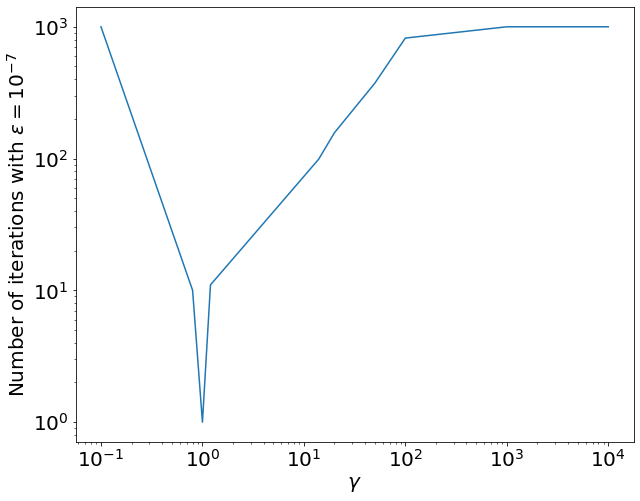

In [24]:
import matplotlib.pyplot as plt 

gammas = [0.1, 0.8, 1,1.2, 8, 14, 20, 50, 100, 1000, 5000, 10000]
# gammas = [1]
num_iter_converg = []
for g in gammas:
    A = np.array([[1, 0], 
                  [0, g]], dtype=np.float64)
    f = lambda x: my_f(x, A)
    gradf = lambda x: my_gradf(x, A)
#     x0 = np.random.rand(A.shape[0])
#     x0 = np.sort(x0)
#     x0 = x0[::-1]
    x0 = np.array([1, 1], dtype=np.float64)
    gd = GradientDescent(f, gradf, x0, 1e-7, 1000,  disp=False, callback=None)
#     methods.fo.GradientDescent(f, gradf, ss.ExactLineSearch4Quad(A))
    x = gd["x"]
    num_iter_converg.append(gd["num_iter"])

plt.figure(figsize=(10, 8))
plt.loglog(gammas, num_iter_converg)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel(r"$\gamma$", fontsize=20)
plt.ylabel(r"Number of iterations with $\varepsilon = 10^{-7}$", fontsize=20)

## Эксперимент на многомерной задаче
Пусть $A \in \mathbb{R}^{m \times n}$. Рассмотрим систему линейных неравенств: $Ax \leq 1$ при условии $|x_i| \leq 1$ для всех $i$.

**Определение.** Аналитическим центром системы неравенств $Ax \leq 1$ при условии $|x_i| \leq 1$ является решение задачи
$$
f(x) = - \sum_{i=1}^m \log(1 - a_i^{\top}x) - \sum_{i = 1}^n \log (1 - x^2_i) \to \min_x
$$
$$
f'(x) - ?
$$

In [29]:
n = 100
m = 200
x0 = np.zeros(n)
A = np.random.rand(n, m)

In [31]:
import cvxpy as cvx
print(cvx.installed_solvers())
x = cvx.Variable(n)

obj = cvx.Minimize(cvx.sum(-cvx.log(1 - A.T * x)) - 
                   cvx.sum(cvx.log(1 - cvx.square(x))))
prob = cvx.Problem(obj)
prob.solve(verbose=True)
x = x.value
print("Optimal value =", prob.value)

['ECOS', 'ECOS_BB', 'OSQP', 'SCIPY', 'SCS']
                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Oct 21 12:09:44 AM: Your problem has 100 variables, 0 constraints, and 0 parameters.
(CVXPY) Oct 21 12:09:44 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 21 12:09:44 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 21 12:09:44 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 21 12:09:44 AM: Compiling problem (target solver=ECOS).
(CVXPY) Oct 21 12:09:44 AM: Reduction chain: Dcp2Co

/Users/Anna.Rudenko/opt/anaconda3/lib/python3.7/site-packages/cvxpy/expressions/expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 7 times so far.

  warnings.warn(msg, UserWarning)


-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Oct 21 12:09:45 AM: Problem status: optimal
(CVXPY) Oct 21 12:09:45 AM: Optimal value: -6.499e+02
(CVXPY) Oct 21 12:09:45 AM: Compilation took 4.877e-02 seconds
(CVXPY) Oct 21 12:09:45 AM: Solver (including time spent in interface) took 1.442e-01 seconds
Optimal value = -649.9009159397438


In [32]:
f = lambda x: -np.sum(np.log(1 - A.T.dot(x))) - np.sum(np.log(1 - x*x))
grad_f = lambda x: np.sum(A.dot(np.diagflat(1 / (1 - A.T.dot(x)))), \
                          axis=1) + 2 * x / (1 - np.power(x, 2))

/Users/Anna.Rudenko/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


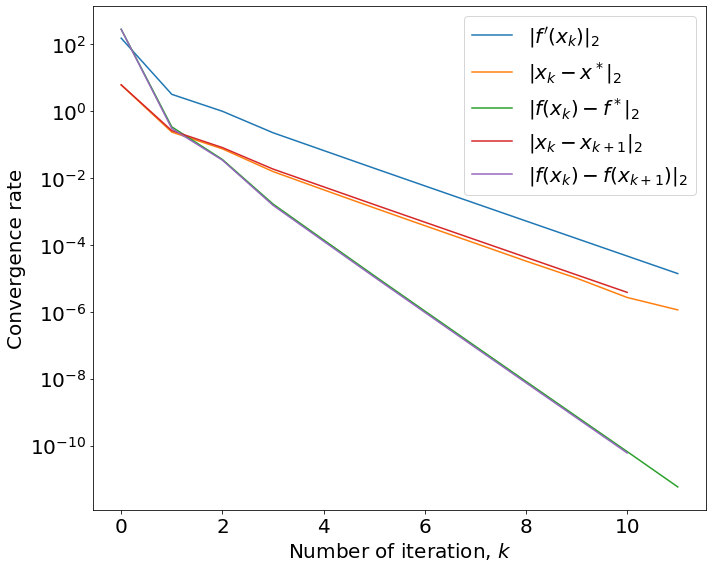

In [33]:

gd = GradientDescent(f, grad_f, x0, 1e-5, 100,  disp=False, callback=None)

x = gd["x"]
x_conv = gd['conv_array']


grad_conv = [np.linalg.norm(grad_f(x)) for x in x_conv]
plt.figure(figsize=(10,8))
plt.semilogy(grad_conv, label=r"$\| f'(x_k) \|_2$")
plt.semilogy([np.linalg.norm(x - np.array(x_k)) for x_k in x_conv], label=r"$\|x_k - x^*\|_2$")
plt.semilogy([np.linalg.norm(prob.value - f(np.array(x_k))) for x_k in x_conv], label=r"$\|f(x_k) - f^*\|_2$")
plt.semilogy([np.linalg.norm(np.array(x_conv[i]) - np.array(x_conv[i+1])) for i in range(len(x_conv) - 1)], label=r"$\|x_k - x_{k+1}\|_2$")
plt.semilogy([np.linalg.norm(f(np.array(x_conv[i])) - f(np.array(x_conv[i+1]))) for i in range(len(x_conv) - 1)], label=r"$\|f(x_k) - f(x_{k+1})\|_2$")
plt.xlabel(r"Number of iteration, $k$", fontsize=20)
plt.ylabel(r"Convergence rate", fontsize=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)
plt.tight_layout()

In [34]:
f(x)

-649.9009159397432

/Users/Anna.Rudenko/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


99
99
99
11
9
7
8
9
10


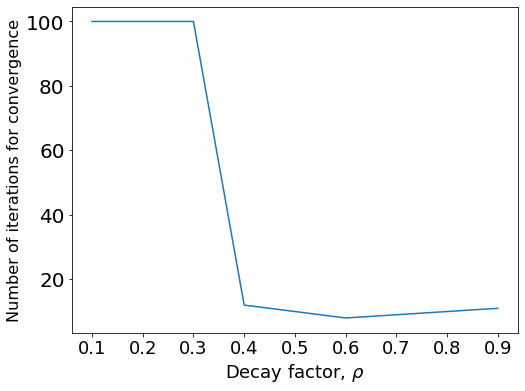

In [45]:
rhos = [0.1 + i * 0.1 for i in range(9)]
conv_iter = []
hist_x = []
x0 = np.zeros(n)
for rho in rhos:
    
    gd = GradientDescent(f, grad_f, x0, 1e-3, 100,  disp=False, callback=None, rho=rho,)

    x = gd["x"]
#     x_conv = gd['conv_array']
#     print(len(x_conv))


    conv_iter.append(gd['num_iter'])
    

    hist_x = []
plt.figure(figsize=(8, 6))
plt.plot(rhos, conv_iter)
plt.xlabel(r"Decay factor, $\rho$", fontsize=18)
plt.ylabel(r"Number of iterations for convergence", fontsize=16)
plt.xticks(fontsize = 18)
_ = plt.yticks(fontsize = 20)

/Users/Anna.Rudenko/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


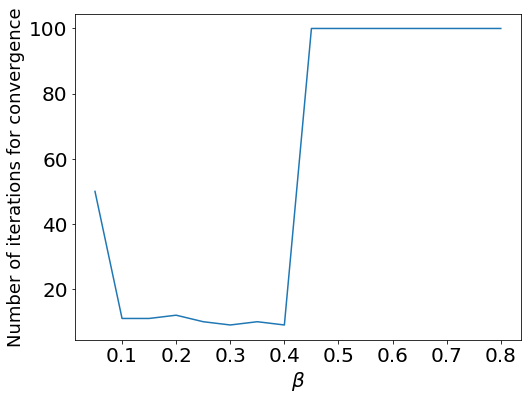

In [47]:
betas = [0.05 + i * 0.05 for i in range(16)]
hist_x = []
num_iter_conv = []
plt.figure(figsize=(8, 6))
for beta in betas:
        
    gd = GradientDescent(f, grad_f, x0, 1e-3, 100,  disp=False, callback=None, rho=rho,)

    x = gd["x"]



    conv_iter.append(gd['num_iter'])
        
    gd = GradientDescent(f, grad_f, x0, 1e-3, 100,  disp=False, callback=None, beta1=beta,)




    num_iter_conv.append(gd['num_iter'])
    
    
plt.plot(betas, num_iter_conv)
plt.xlabel(r"$\beta$", fontsize=20)
plt.ylabel(r"Number of iterations for convergence", fontsize=18)
plt.xticks(fontsize = 20)
_ = plt.yticks(fontsize = 20)